# **Calculating Carbonate System Equilibrium with `pyEQL`**

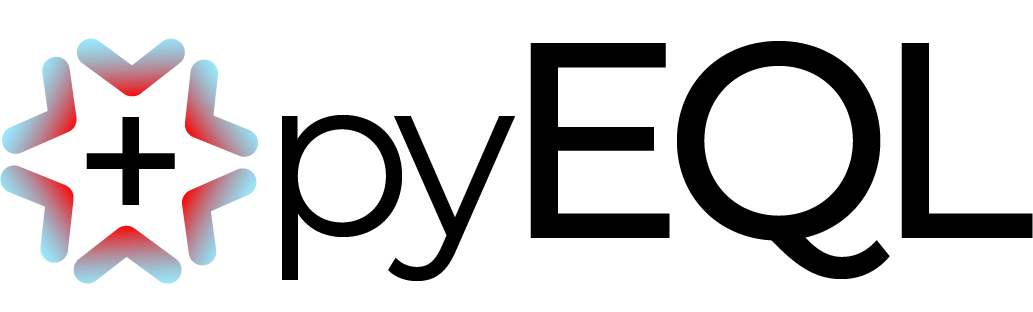


This notebook demonstrates how to use the pyEQL library to calculate equilibrium conditions in a carbonate system, specifically focusing on the concentrations of CO<sub>2</sub>, HCO<sub>3</sub><sup>-</sup>, H<sup>+</sup> in an aqueous solution.

In this tutorial, users will learn to set up a basic equilibrium system with pyEQL, define initial species concentrations, and calculate both the equilibrium pH and final species concentrations.

For more information refer to the [pyEQL Quickstart](https://pyeql.readthedocs.io/en/latest/quickstart.html)

*Tutorial by Nikhil Dhruv and Ryan Kingsbury*

# Step 1: Install and Import Libraries

First, we need to install pyEQL and import the necessary libraries. pyEQL provides functions for equilibrium calculations in aqueous chemistry, making it well-suited for modeling the carbonate system.


In [1]:
# Install pyEQL (only needed if not already installed)
# Don't need > /dev/null 2>&1

!pip install pyEQL > /dev/null 2>&1

# Import the pyEQL library and other necessary modules
import pyEQL
import numpy as np
import matplotlib.pyplot as plt


# Step 2: Define Initial Concentrations for Carbonate Species


Define the initial concentrations of the carbonate species in mol/L. For this example, we'll include:




*   **Bicarbonate** (`HCO3-`) at 1.0e-3mol/L
*   **Carbonate** (`CO3-2`) at 1.0e-4mol/L
*   **Hydrogen ions** (`H+`) representing neutral pH (pH=7)




In [54]:
solution = pyEQL.Solution(initial_conditions)
solution.pH

4.004913801641528

In [59]:
solution = pyEQL.Solution(initial_conditions, pH=10)
solution.pH

10.000195364947507

In [60]:
initial_conditions = {
    'HCO3-': 1.0e-3,
    'CO3--': 1.0e-4,
    'H+': 1.0e-7 # Note: instead of including H+ here, you could use the pH keyword argument
}

# Section 2: Initialize the Solution


After the libraries are installed and imported, create a ` Solution ` object to represent the carbonate system where equilibrium occurs

In [3]:
# Initialize the solution
solution = pyEQL.Solution(initial_conditions)

# Step 4: Retrieve and Display Initial Concentrations

Next, we will use [`Solution.get_amount()`](https://pyeql.readthedocs.io/en/latest/class_solution.html#pyEQL.Solution.get_amount) to display the initial concentrations for each species in the carbonate system. Remember, we have not equilibrated the solution until we call [`Solution.equilibrate()`](https://pyeql.readthedocs.io/en/latest/class_solution.html#pyEQL.Solution.equilibrate)!

In [4]:
# Retrieve equilibrium concentrations using get_amount
{species: solution.get_amount(species, 'mol/L').magnitude for species in solution.components}

{'H2O(aq)': 55.319705873262286,
 'HCO3[-1]': 0.016333195734562208,
 'CO3[-2]': 0.0016607536395842363,
 'H[+1]': 9.887493212140253e-05,
 'OH[-1]': 9.995506319339221e-08}

# Step 5: Equilibrate the `Solution` and re-examine the concentrations

`equilibrate` uses the [Electrolyte Modeling Engine](https://pyeql.readthedocs.io/en/latest/engines.html) to calculate the
concentrations of individual species in the `Solution` after it comes into thermodynamic equilibrium. The default modeling engine does this based on the USGS
[PHREEQC software](https://www.usgs.gov/software/phreeqc-version-3). Notice how additional species appear (such as `CO2(aq)`) appear.

In [5]:
solution.equilibrate()
# Retrieve equilibrium concentrations using get_amount
{species: solution.get_amount(species, 'mol/L').magnitude for species in solution.components}

{'H2O(aq)': 55.319705873262286,
 'CO2(aq)': 0.017914993150922456,
 'H[+1]': 9.9612076212742e-05,
 'HCO3[-1]': 7.89561874012311e-05,
 'OH[-1]': 9.815800515624362e-11,
 'CO3[-2]': 3.661456852916522e-11,
 'H2(aq)': 7.730951850139117e-29,
 'O2(aq)': 1.0539559631767556e-36}

# Step 6: Examine how Species Concentrations Changes as a function of pH

In this step, we’ll create a line graph to visualize the equilibrium concentrations of each species in the carbonate system as we vary the pH.

We’ll use ` matplotlib ` to plot the results, with different colors for each of the key species

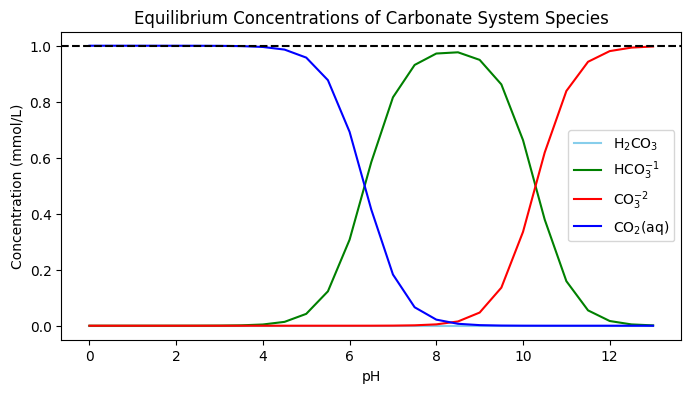

In [50]:
import matplotlib.pyplot as plt

# iterate through several pH values, re-equilibrating the solution each time the pH changes
phs = np.arange(0,13.5, 0.5)
# store the species concentrations in these lists
h2co3 = []
hco3 = []
co3 = []
co2 = []

for ph in phs:
    # create a solution with 1 mM total carbonate, then equilibrate
    s = pyEQL.Solution({"Na+": "1e-3 mol/L", "HCO3-": "1e-3 mol/L"}, pH=ph)
    s.equilibrate()
    h2co3.append(s.get_amount('H2CO3', 'mM').magnitude)
    hco3.append(s.get_amount('HCO3-', 'mM').magnitude)
    co3.append(s.get_amount('CO3-2', 'mM').magnitude)
    co2.append(s.get_amount('CO2', 'mM').magnitude)

# Plotting the equilibrium concentrations
plt.figure(figsize=(8,4))
plt.plot(phs, h2co3, color='skyblue', label=r"H$_2$CO$_3$")
plt.plot(phs, hco3, color='g', label=r"HCO$_3^{-1}$")
plt.plot(phs, co3, color='r', label=r"CO$_3^{-2}$")
plt.plot(phs, co2, color='b', label=r"CO$_2$(aq)")

# add a horizontal line for the total carbonate concentration
plt.axhline(1, ls="--", color="k")
# add labels and legend
plt.xlabel('pH')
plt.ylabel('Concentration (mmol/L)')
plt.legend()
plt.title('Equilibrium Concentrations of Carbonate System Species')
plt.show()

The plot above is exactly consistent with what we'd expect to see based on [carbonic acid equlibrium](https://en.wikipedia.org/wiki/Carbonic_acid).